In [1]:
%pylab inline
from octopus import shapes, orbit_cm
from pygadgetreader import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
# Function to iterate over the radius of the halo
def iterate_volume(X, Y, Z, R, tol):
    s = np.zeros(len(R))
    q = np.zeros(len(R))
    for i in range(len(R)):
        s[i], q[i] = shapes.iterate_volume(X, Y, Z, R[i], tol)
    return s, q

time 000
Returning DM    Positions
time 010
Returning DM    Positions
time 020
Returning DM    Positions
time 030
Returning DM    Positions
time 040
Returning DM    Positions


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: ComplexWarning: Casting complex values to real discards the imaginary part


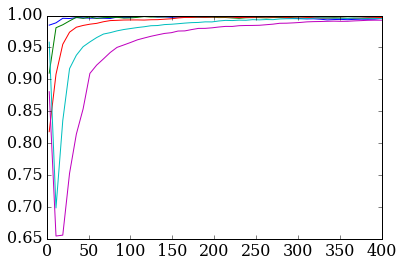

In [7]:
times_mw = [0, 10, 20, 30, 40]
N_mw = 50
r_mw = np.linspace(3, 400, N_mw)
for i in times_mw:
    print 'time {:0>3d}'.format(i)
    pos = readsnap(('../data/MW_models/pm/model2/MWN2vir_{:0>3d}.hdf5').format(i), 'pos', 'dm')  
    s, q = iterate_volume(pos[:,0], pos[:,1], pos[:,2], r_mw, 1E-1)
    plot(r_mw, s)

In [9]:
# Loading simulation data from N-body simulations
dm_pos_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')
dm_vel_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'vel', 'dm')
dm_ids_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pid', 'dm')

dm_pos_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pos', 'dm')
dm_vel_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'vel', 'dm')
dm_ids_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pid', 'dm')

# Loading data of isolated MW:
mw_pos_i = readsnap('../data/MW_models/pm/model2/MWN2vir_000.hdf5', 'pos', 'dm')
mw_pos_f = readsnap('../data/MW_models/pm/model2/MWN2vir_014.hdf5', 'pos', 'dm')

# MW dif res
mw2_pos_i = readsnap('../data/MW_models/pm/dif_res/MW2_2M_010', 'pos', 'dm')
mw4_pos_i = readsnap('../data/MW_models/pm/dif_res/MW2_4M_010', 'pos', 'dm')
mw10_pos_i = readsnap('../data/MW_models/pm/dif_res/MW2_10M_010', 'pos', 'dm')
mw30_pos_i = readsnap('../data/MW_models/pm/dif_res/MW2UHRvir_000.hdf5', 'pos', 'dm')


Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Positions
Returning DM    Positions
Returning DM    Positions
Returning DM    Positions
Returning DM    Positions


In [10]:
def mw_particles(xyz, vxyz, ids, N_halo):
    id_cut = np.sort(ids)[N_halo]
    index_mw = np.where(ids<id_cut)[0]
    return xyz[index_mw], vxyz[index_mw]

In [11]:
mw_pos_i, mw_vel_i = mw_particles(dm_pos_i, dm_vel_i, dm_ids_i, 1000000)
mw_pos_f, mw_vel_f = mw_particles(dm_pos_f, dm_vel_f, dm_ids_f, 1000000)

In [12]:
# Computing the CM
xcm_i, ycm_i, zcm_i, vx_cmi, vy_cmi, vz_cmi = orbit_cm.CM(mw_pos_i, mw_vel_i)
xcm_f, ycm_f, zcm_f, vx_cmf, vy_cmf, vz_cmf = orbit_cm.CM(mw_pos_f, mw_vel_f)

In [13]:
print xcm_i, ycm_i, zcm_i
print xcm_f, ycm_f, zcm_f

0.0326767973748 -0.0160168181304 -0.025037442445
3.14213492468 33.1085245965 -10.5106429199


In [14]:
N_r = 200
r = np.linspace(3, 400, N_r)

# Different resolutions of ther MW
q_mw1_v = np.zeros(N_r)
s_mw1_v = np.zeros(N_r)

q_mw2_v = np.zeros(N_r)
s_mw2_v = np.zeros(N_r)

q_mw4_v = np.zeros(N_r)
s_mw4_v = np.zeros(N_r)

q_mw10_v = np.zeros(N_r)
s_mw10_v = np.zeros(N_r)

q_mw30_v = np.zeros(N_r)
s_mw30_v = np.zeros(N_r)

# LMC

q_mw_v_i = np.zeros(N_r)
s_mw_v_i = np.zeros(N_r)

q_mw_v_f = np.zeros(N_r)
s_mw_v_f = np.zeros(N_r)


q_mwlmc_v_i = np.zeros(N_r)
s_mwlmc_v_i = np.zeros(N_r)

q_mwlmc_v_f = np.zeros(N_r)
s_mwlmc_v_f = np.zeros(N_r)

# MW evolving in time

# MW-LMC evolving in time

In [10]:
for i in range(len(r)):
    q_mw_v_i[i], s_mw_v_i[i] = shapes.iterate_volume(mw_pos_i[:,0]-xcm_i, mw_pos_i[:,1]-ycm_i, mw_pos_i[:,2]-zcm_i, r[i], 1E-3)
    q_mw_v_f[i], s_mw_v_f[i] = shapes.iterate_volume(mw_pos_f[:,0]-xcm_f, mw_pos_f[:,1]-ycm_f, mw_pos_f[:,2]-zcm_f, r[i], 1E-3)
    if i%10==0:
        print 'done', i

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


done 0
done 10
done 20
done 30
done 40
done 50
done 60
done 70
done 80
done 90
done 100
done 110
done 120
done 130
done 140
done 150
done 160
done 170
done 180
done 190


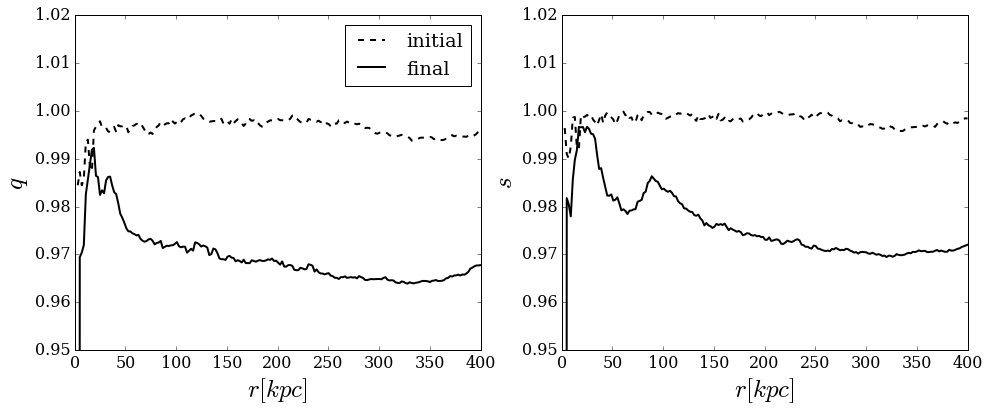

In [15]:
figure=(figsize(16,6))
subplot(1, 2, 1)
plot(r, q_mw_v_i, ls='--', c='k', lw=2.0, label='initial')
plot(r, q_mw_v_f, ls='-', c='k', lw=2.0, label='final')
ylabel('$q$', fontsize=25)
xlabel('$r[kpc]$', fontsize=25)
ylim([0.95, 1.02])
legend(loc='best')

subplot(1, 2, 2)
plot(r, s_mw_v_i, ls='--', c='k', lw=2.0)
plot(r, s_mw_v_f, ls='-', c='k', lw=2.0)
xlabel('$r[kpc]$', fontsize=25)
ylabel('$s$', fontsize=25)
ylim([0.95, 1.02])


savefig('shape_MW.png', bbox_inches='tight')

In [41]:
print q

[ 0.99283001  0.9941538   0.99265508  0.99645522  0.99791139  0.99915889
  0.99869307  0.99955663  0.99892348  0.99899179  0.9975096   0.99946812
  0.99826725  0.9972491   0.99802301  0.9995252   0.99827116  0.99733949
  0.99629524  0.99618699  0.9966166   0.99730371  0.99744567  0.996958
  0.99697226  0.99673928  0.99621231  0.99541656  0.99577115  0.99525182
  0.99543529  0.99530309  0.99502038  0.99550442  0.99495486  0.99432119
  0.99358899  0.99344137  0.99298693  0.99289965  0.99300303  0.9925423
  0.99229259  0.99163026  0.99156178  0.9907771   0.99114342  0.99096654
  0.99037126  0.99011432  0.98966524  0.98902441  0.98871024  0.98804764
  0.98762918  0.98738521  0.98672358  0.98638875  0.9860189   0.98537762
  0.98513253  0.9850151   0.98491946  0.98430898  0.98345129  0.98297338
  0.98277124  0.98248226  0.98223092  0.98227758  0.98207183  0.98160018
  0.98148307  0.98126697  0.98125657  0.98140217  0.98102412  0.98088132
  0.98130219  0.98163242  0.98197789  0.98234285  0.98

time 000
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
cm coordinates:  0.0326767973748 -0.0160168181304 -0.025037442445
time 040
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
cm coordinates:  -0.333034704717 2.19050631327 0.10891640848
time 080
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
cm coordinates:  -0.101391412611 11.7673158106 0.327615958576
time 119
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
cm coordinates:  3.14213492468 33.1085245965 -10.5106429199


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: ComplexWarning: Casting complex values to real discards the imaginary part


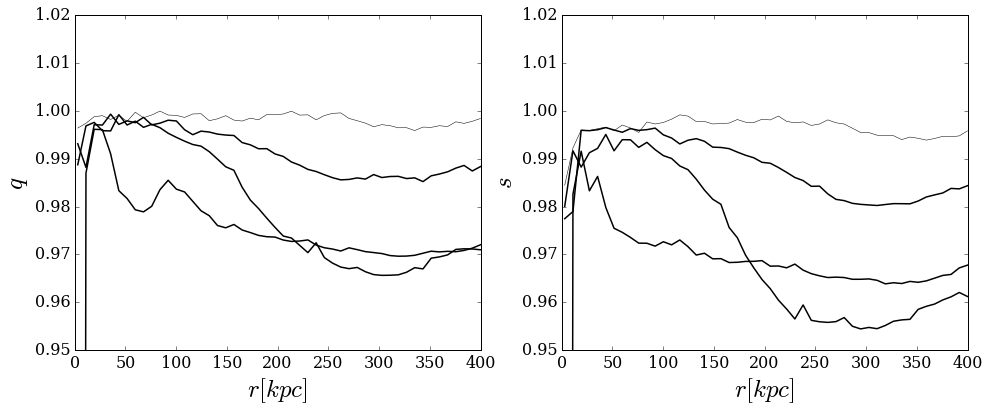

In [40]:
times_mwlmc = [0, 40, 80, 119]
k = 0
N_mw = 50
r_mw = np.linspace(3, 400, N_mw)
widths = [0.5, 1.5, 2.5, 3.5]
for i in times_mwlmc:
    print 'time {:0>3d}'.format(i)
    pos = readsnap(('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_{:0>3d}.hdf5').format(i), 'pos', 'dm') 
    vel = readsnap(('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_{:0>3d}.hdf5').format(i), 'vel', 'dm') 
    ids = readsnap(('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_{:0>3d}.hdf5').format(i), 'pid', 'dm') 
    mw_pos, mw_vel = mw_particles(pos, vel, ids, 1000000)
    xcm, ycm, zcm, vxcm, vycm, vzcm = orbit_cm.CM(mw_pos, mw_vel)
    print 'cm coordinates: ', xcm, ycm, zcm
    s, q = iterate_volume(mw_pos[:,0]-xcm, mw_pos[:,1]-ycm, mw_pos[:,2]-zcm, r_mw, 1E-3)
    
    figure=(figsize(16,6))
    subplot(1, 2, 1)
    plot(r_mw, q, ls='-', c='k', lw=widths[k])
    ylabel('$q$', fontsize=25)
    xlabel('$r[kpc]$', fontsize=25)
    ylim([0.95, 1.02])
    legend(loc='best')

    subplot(1, 2, 2)
    plot(r_mw, s, ls='-', c='k', lw=widths[k])
    xlabel('$r[kpc]$', fontsize=25)
    ylabel('$s$', fontsize=25)
    ylim([0.95, 1.02])

    k=+1
    savefig('shape_MW_time.png', bbox_inches='tight')

In [15]:
# This one in computed from the outter regions to the inners
N_lmc = 50
r_lmc = np.linspace(3, 400, N_mw)

for i in range(len(r_lmc)):
    #q_mwlmc_v_i[i], s_mwlmc_v_i[i] = shapes.iterate_volume(dm_pos_i[:,0]-xcm_i, dm_pos_i[:,1]-ycm_i, dm_pos_i[:,2]-zcm_i, r2[i], 1E-1)
    q_mwlmc_v_f[i], s_mwlmc_v_f[i] = shapes.iterate_volume(dm_pos_f[:,0]-xcm_f, dm_pos_f[:,1]-ycm_f, dm_pos_f[:,2]-zcm_f, r_lmc[i], 1E-1)
    if i%10==0:
        print 'done', i

done 0
done 10
done 20
done 30
done 40


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: ComplexWarning: Casting complex values to real discards the imaginary part


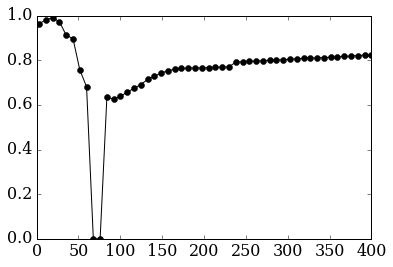

In [18]:
plot(r_lmc, q_mwlmc_v_f[:50], '-o', c='k')

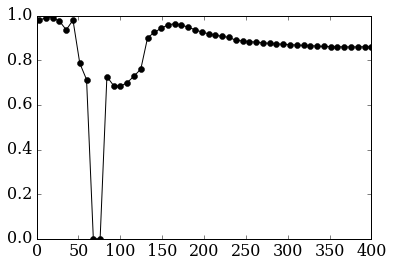

In [19]:
plot(r_lmc, s_mwlmc_v_f[:50], '-o', c='k')

In [ ]:
# Finding shape of the MW:
N_r = 200
r = np.linspace(3, 400, N_r)

q_mw_s_i = np.zeros(int(N_r))
s_mw_s_i = np.zeros(int(N_r))
q_mw_v_i = np.zeros(int(N_r))
s_mw_v_i = np.zeros(int(N_r))


q_mw_s_f = np.zeros(int(N_r))
s_mw_s_f = np.zeros(int(N_r))
q_mw_v_f = np.zeros(int(N_r))
s_mw_v_f = np.zeros(int(N_r))

In [ ]:
for i in range(len(r)):
    q_mw_v_i[i], s_mw_v_i[i] = shapes.iterate_volume(mw_pos_i[:,0], mw_pos_i[:,1], mw_pos_i[:,2], r[i], 1E-1)
    q_mw_v_f[i], s_mw_v_f[i] = shapes.iterate_volume(mw_pos_f[:,0], mw_pos_f[:,1], mw_pos_f[:,2], r[i], 1E-1)

In [ ]:
for i in range(len(r)):
    q_mw_s_i[i], s_mw_s_i[i] = shapes.iterate_shell(mw_pos_i[:,0], mw_pos_i[:,1], mw_pos_i[:,2], r[i], 1.0, 1E-2)
    q_mw_s_f[i], s_mw_s_f[i] = shapes.iterate_shell(mw_pos_f[:,0], mw_pos_f[:,1], mw_pos_f[:,2], r[i], 1.0, 1E-2)

In [ ]:
plot(r, q_mw_s_i, ls='--', c='g')
plot(r, s_mw_s_i, ls='--', c='b', label='shells')

plot(r, s_mw_s_f, ls='-', c='g')
plot(r, q_mw_s_f, ls='-', c='b', label='spheres')

In [ ]:
plot(r, q_mw_v_i, ls='--', c='b')
plot(r, s_mw_v_i, ls='--', c='g', label='spheres')

plot(r, q_mw_v_f, ls='-', c='b')
plot(r, s_mw_v_f, ls='-', c='g', label='spheres')

In [ ]:
for i in range(len(r)):
    q_mw1_v[i], s_mw1_v[i] = shapes.iterate_volume(mw2_pos_i[:,0], mw2_pos_i[:,1], mw2_pos_i[:,2], r[i], 1E-1)
    q_mw2_v[i], s_mw2_v[i] = shapes.iterate_volume(mw2_pos_i[:,0], mw2_pos_i[:,1], mw2_pos_i[:,2], r[i], 1E-1)
    q_mw4_v[i], s_mw4_v[i] = shapes.iterate_volume(mw4_pos_i[:,0], mw4_pos_i[:,1], mw4_pos_i[:,2], r[i], 1E-1)
    q_mw10_v[i], s_mw10_v[i] = shapes.iterate_volume(mw10_pos_i[:,0], mw10_pos_i[:,1], mw10_pos_i[:,2], r[i], 1E-1)
    q_mw30_v[i], s_mw30_v[i] = shapes.iterate_volume(mw30_pos_i[:,0], mw30_pos_i[:,1], mw30_pos_i[:,2], r[i], 1E-1)

In [ ]:
figure(figsize=(19, 7))
subplot(1, 2, 1)
plot(r, q_mw2_v, ls='-', c='b', label='2M')

plot(r, q_mw4_v, ls='-', c='g', label='4M')

plot(r, q_mw10_v, ls='-', c='r', label='10M')

plot(r, q_mw30_v, ls='-', c='k',label='30M')

legend(loc='best')
ylim(0.9, 1.01)
plt.xlabel('$r$', fontsize=25)
plt.ylabel('$q$', fontsize=25)

subplot(1, 2, 2)
plot(r, s_mw2_v, ls='-', c='b')
plot(r, s_mw4_v, ls='-', c='g')
plot(r, s_mw10_v, ls='-', c='r')
plot(r, s_mw30_v, ls='-', c='k')

ylim(0.9, 1.01)
plt.xlabel('$r$', fontsize=25)
plt.ylabel('$s$', fontsize=25)

savefig('shapesMWdifres.png', bbox_inches='tight')
